# import data

In [4]:
import numpy as np
import pandas as pd
from tqdm import trange
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error
drive.mount('/content/drive')

%cd /content/drive/MyDrive/

df = pd.read_excel('final project.xlsx')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


,FC,OC,FO,InOr,F,sF,aF,O,sO,aO,C,sC,aC,CE (%),LCE
0,0.013968,0.841985,0.016590,0.876330,0.004138,0.004138,0.000000,0.249421,0.225276,0.024145,0.296230,0.296230,0.000000,80.0,0.698970
1,0.145478,1.000000,0.145478,1.169724,0.038283,0.000000,0.038283,0.263151,0.263151,0.000000,0.263151,0.263151,0.000000,80.0,0.698970
2,0.142634,0.984784,0.144838,1.151664,0.037562,0.012022,0.025541,0.259341,0.259341,0.000000,0.263348,0.263348,0.000000,80.0,0.698970
3,0.239912,0.725009,0.330909,0.984914,0.070254,0.000000,0.070254,0.212305,0.206451,0.005854,0.292831,0.275267,0.017563,80.6,0.712198
4,0.145809,0.822983,0.177171,0.993093,0.038295,0.000000,0.038295,0.216146,0.216146,0.000000,0.262638,0.262638,0.000000,82.0,0.744727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.721885,0.364672,1.979545,1.210062,0.191402,0.169571,0.021831,0.096690,0.053028,0.043661,0.265142,0.265142,0.000000,99.5,2.301030
146,1.368421,0.473684,2.888889,2.000000,0.325000,0.300000,0.025000,0.112500,0.062500,0.050000,0.237500,0.237500,0.000000,99.5,2.301030
147,1.124031,0.596899,1.883117,1.837209,0.270522,0.251866,0.018657,0.143657,0.106343,0.037313,0.240672,0.240672,0.000000,99.5,2.301030
148,0.728002,0.456004,1.596481,1.276010,0.183222,0.167785,0.015437,0.114766,0.083892,0.030873,0.251677,0.251677,0.000000,99.5,2.301030


# stepwise selection

## using my own code

the 1th important feature is sO, training MSE results is 0.10495159333325435, training R2 is 0.48673459089446114
the 2th important feature is aC, training MSE results is 0.08505776020801765, training R2 is 0.5840253139164487
the 3th important feature is InOr, training MSE results is 0.07172195466752558, training R2 is 0.649244025410977
the 4th important feature is sF, training MSE results is 0.06726027997808069, training R2 is 0.6710638302566473
the 5th important feature is OC, training MSE results is 0.06154212645753665, training R2 is 0.6990284405387512
the 6th important feature is aO, training MSE results is 0.060920676977702946, training R2 is 0.7020676370995167
the 7th important feature is FC, training MSE results is 0.06022773329481706, training R2 is 0.7054564758163733
the 8th important feature is FO, training MSE results is 0.05968871935561874, training R2 is 0.708092521646928
the 9th important feature is aF, training MSE results is 0.05886268942820697, training R2 is 0.7121322

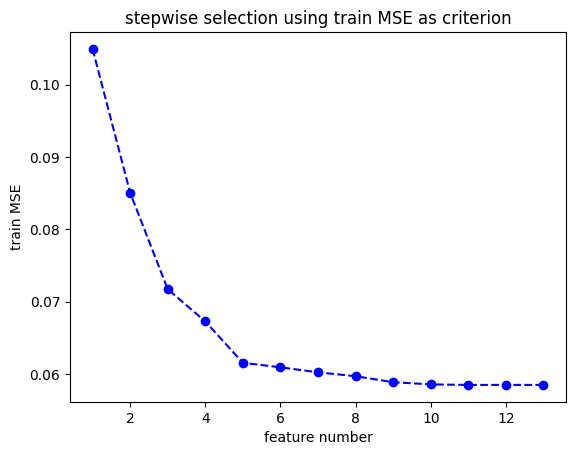

In [5]:
# choose train MSE as step selection criterion
features = [i for i in df.columns]
features = features[:-2]
features_left = features.copy()
features_select = []
saving_para = 0
y_org = df.iloc[:, -1].to_numpy()
trainMSE_selected = []
while saving_para < len(features):
  x_select = df[features_select].to_numpy()
  results = []
  results_2 = []
  for i in features_left:
    i_array = df[i].to_numpy()
    if x_select.shape[1] <= 0:
      x_org = i_array
      x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
      reg = LinearRegression().fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
      f3_test = reg.predict(x_test.reshape(-1,1))
      f3_test = f3_test.flatten()
      f3_train =  x_train*reg.coef_[0]+reg.intercept_[0]
    elif x_select.shape[1] > 0:
      x_org = np.concatenate((x_select.reshape(-1,x_select.shape[1]),i_array.reshape(-1,1)),axis=1)
      x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
      reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
      f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
      f3_test = f3_test.flatten()
      f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
    r2_train = r2_score(y_train, f3_train)
    r2_test = r2_score(y_test, f3_test)
    MSE_test = mean_squared_error(y_test, f3_test)
    MSE_train = mean_squared_error(y_train, f3_train)
    results.append(MSE_train)
    results_2.append(r2_train)
  item_1 = np.argmin(results)
  print('the {}th important feature is {}, training MSE results is {}, training R2 is {}'.format(saving_para+1, features_left[item_1],results[item_1],results_2[item_1]))
  trainMSE_selected.append(results[item_1])
  features_select.append(features_left[item_1])
  del features_left[item_1]
  saving_para += 1
print(features_select)
plt.plot([i for i in range(1,len(trainMSE_selected)+1)],trainMSE_selected,'--bo')
plt.title('stepwise selection using train MSE as criterion')
plt.xlabel('feature number')
plt.ylabel('train MSE')
plt.show()

## using sklearn package

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
features = [i for i in df.columns]
features = features[:-2]
y_org = df.iloc[:, -1].to_numpy()
X_org = df[features].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.2, random_state=0)
for i in range(1,len(features)):
  sfs1 = SFS(estimator = LinearRegression(),
            n_features_to_select=i)
  sfs1 = sfs1.fit(x_train, y_train)
  List_1 = sfs1.get_feature_names_out()
  List_arg = []
  List_fea = []
  for j in List_1:
    List_arg.append(int(j[1:]))
  for j in List_arg:
    List_fea.append(features[j])
  print(List_fea)

['sO']
['sF', 'sO']
['sF', 'sO', 'aC']
['OC', 'sF', 'sO', 'aC']
['OC', 'InOr', 'sF', 'sO', 'aC']
['OC', 'InOr', 'sF', 'sO', 'aO', 'aC']
['OC', 'InOr', 'sF', 'O', 'sO', 'aO', 'aC']
['OC', 'FO', 'InOr', 'sF', 'O', 'sO', 'aO', 'aC']
['OC', 'FO', 'InOr', 'sF', 'O', 'sO', 'aO', 'C', 'aC']
['OC', 'FO', 'InOr', 'sF', 'O', 'sO', 'aO', 'C', 'sC', 'aC']
['OC', 'FO', 'InOr', 'sF', 'aF', 'O', 'sO', 'aO', 'C', 'sC', 'aC']
['OC', 'FO', 'InOr', 'F', 'sF', 'aF', 'O', 'sO', 'aO', 'C', 'sC', 'aC']


sklearn package giving sequence is

sO, sF, aC, OC, InOr, aO, O, FO, C, sC, aF, F

Both methode get different results fromm paper selection result, so I do linear regression using my code's result and paper's result

# my own code feature selection result

## take first 8th feature getting result

[-4.50178027]
results for feature number 1
testing MSE: 0.09485244299183088
testing R^2 0.24814477263307133


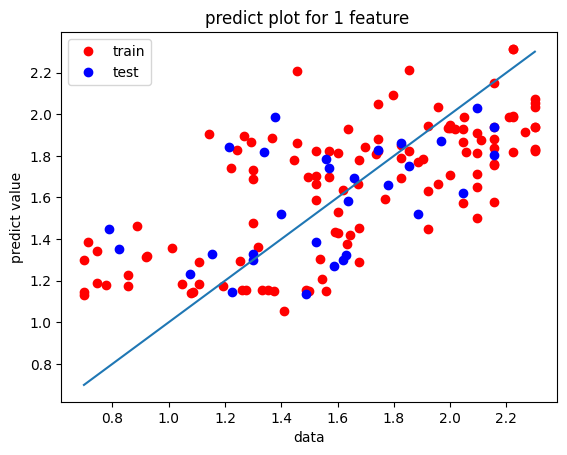

[ -4.9886129  -12.98426429]
results for feature number 2
testing MSE: 0.10263146658857374
testing R^2 0.18648374029123138


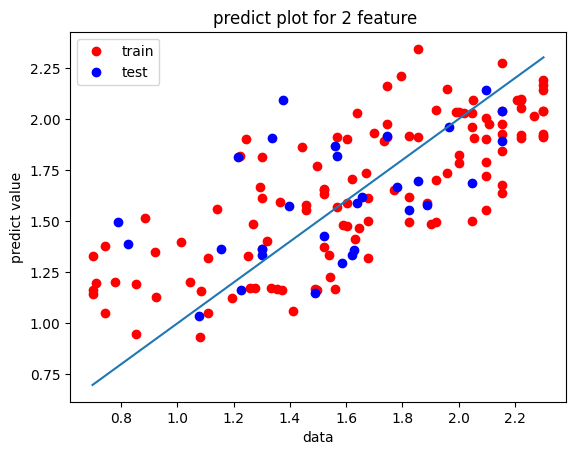

[ -4.78617156 -13.07527487   0.19402317]
results for feature number 3
testing MSE: 0.07934638899996789
testing R^2 0.37105470918178085


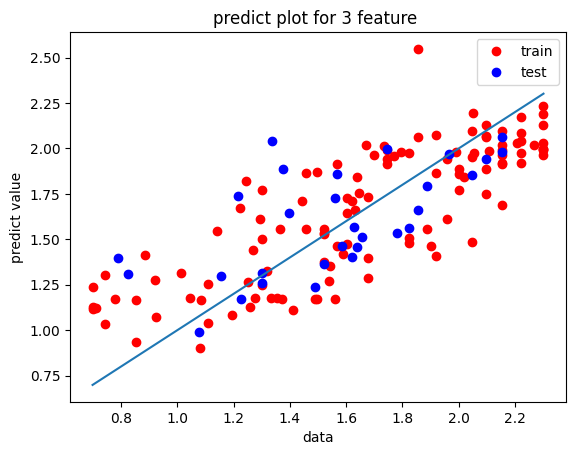

[ -4.3364721  -10.99119128   0.15495134   0.81122291]
results for feature number 4
testing MSE: 0.0798460471761189
testing R^2 0.3670941299938718


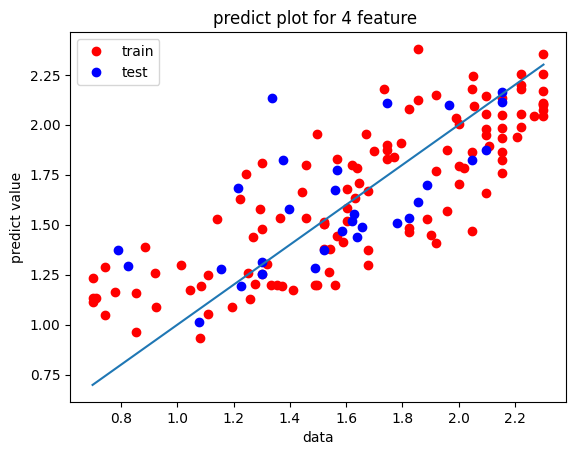

[-6.24491955 -5.94676514 -0.31544017  2.76308788  1.00116505]
results for feature number 5
testing MSE: 0.07351198740631194
testing R^2 0.4173015447759463


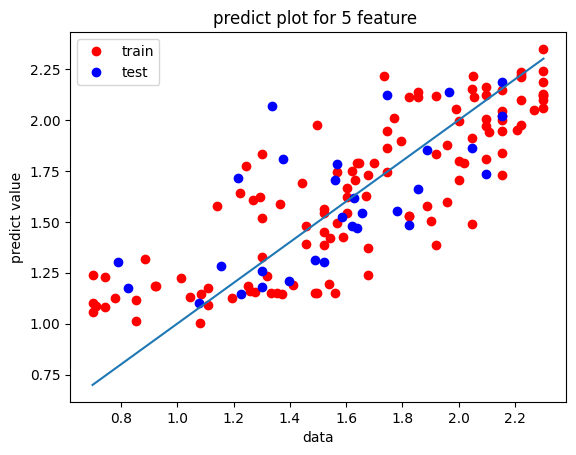

[-7.41100677 -5.42508901 -0.33095758  2.80792187  1.28173837 -2.1357391 ]
results for feature number 6
testing MSE: 0.07602593565788902
testing R^2 0.39737453947529244


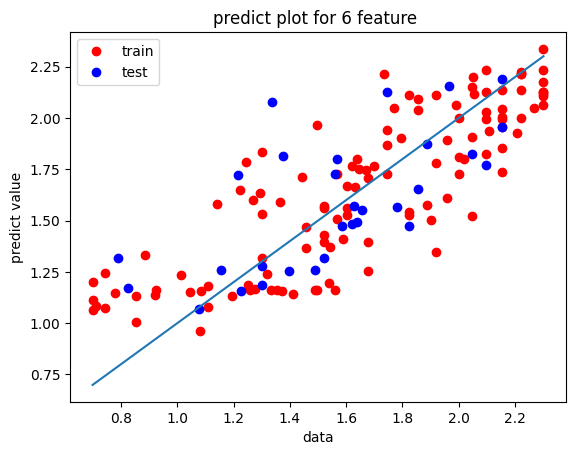

[-7.54167843 -2.12441442 -0.17935726  4.53147322  1.20397421 -2.36440879
 -0.56576606]
results for feature number 7
testing MSE: 0.08116252453010424
testing R^2 0.3566589704019433


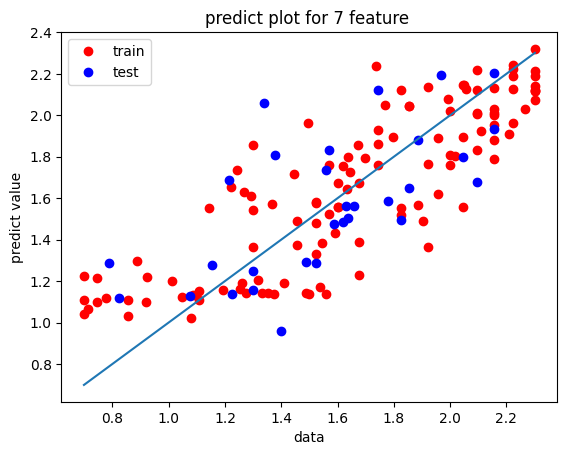

[-7.22237918 -2.90164444 -0.14967693  4.45212981  1.14029116 -1.98921875
 -0.65689383  0.04308778]
results for feature number 8
testing MSE: 0.07985033415094572
testing R^2 0.3670601489562574


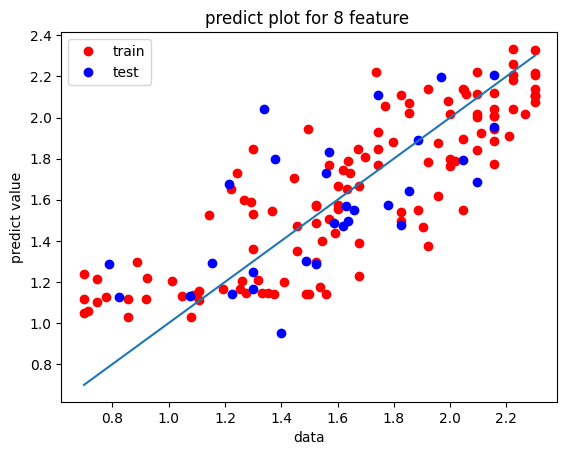

In [ ]:
from matplotlib import pyplot as plt
y_org = df.iloc[:, -1].to_numpy()
y_plot = np.linspace(np.min(y_org),np.max(y_org))
for i in range(1,9):   #take only until 8th feature as later not contribute
  x_org = df[features_select[:i]].to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
  f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
  f3_test = f3_test.flatten()
  f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
  r2_train = r2_score(y_train, f3_train)
  r2_test = r2_score(y_test, f3_test)
  MSE_test = mean_squared_error(y_test, f3_test)
  print(reg.coef_[0])
  print('results for feature number',i)
  print('testing MSE:',MSE_test)
  print('testing R^2',r2_test)
  plt.plot(y_train, f3_train, 'ro', label='train')
  plt.plot(y_test, f3_test, 'bo', label='test')
  plt.plot(y_plot,y_plot)
  plt.legend()
  plt.title('predict plot for {} feature '.format(i))
  plt.xlabel('data')
  plt.ylabel('predict value')
  plt.show()

## use 4 fold CV and BIC choose best model

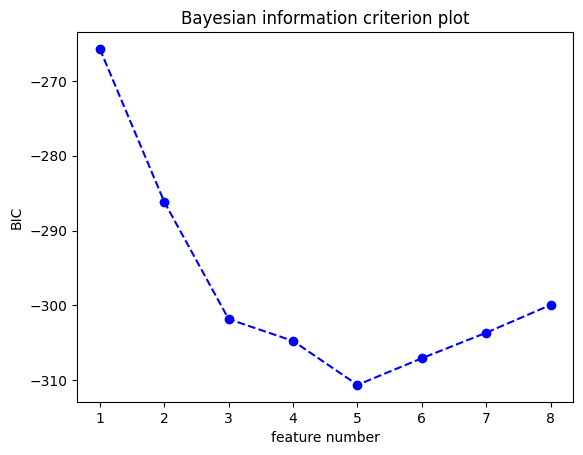

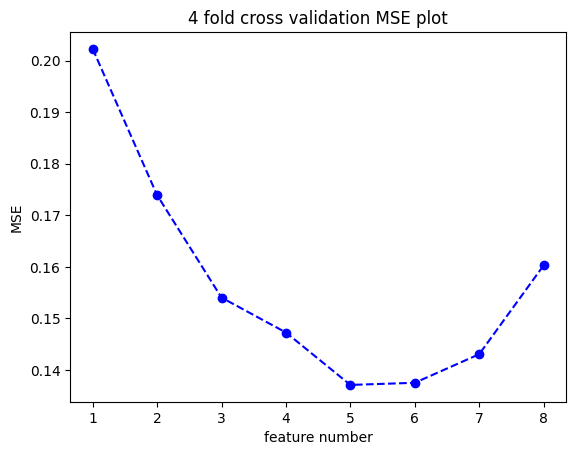

In [ ]:
BIC_mod = []
CV_mod = []
for i in range(1,9):   #take only until 8th feature as later not contribute
  x_org = df[features_select[:i]].to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
  f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
  f3_test = f3_test.flatten()
  f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
  MSE_test = mean_squared_error(y_test, f3_test)
  MSE_train = mean_squared_error(y_train, f3_train)
  BIC = x_train.shape[0]*np.log(MSE_train)+i*np.log(x_train.shape[0])
  BIC_mod.append(BIC)
  scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)
  score = cross_val_score(reg, x_org, y_org, cv=4, scoring=scoring_metrics)
  mse = -score.mean()
  CV_mod.append(mse)
plt.plot([i for i in range(1,len(BIC_mod)+1)],BIC_mod,'--bo')
plt.title('Bayesian information criterion plot')
plt.xlabel('feature number')
plt.ylabel('BIC')
plt.show()
plt.plot([i for i in range(1,len(CV_mod)+1)],CV_mod,'--bo')
plt.title('4 fold cross validation MSE plot')
plt.xlabel('feature number')
plt.ylabel('MSE')
plt.show()

5 features model is the best

## best model result

-6.244*sO + -5.946*aC + -0.315*InOr + 2.7630*sF + 1.0011*OC + 2.0668
training MSE 0.06154212645753665
training R^2 0.6990284405387512
testing MSE: 0.07351198740631194
testing R^2 0.4173015447759463


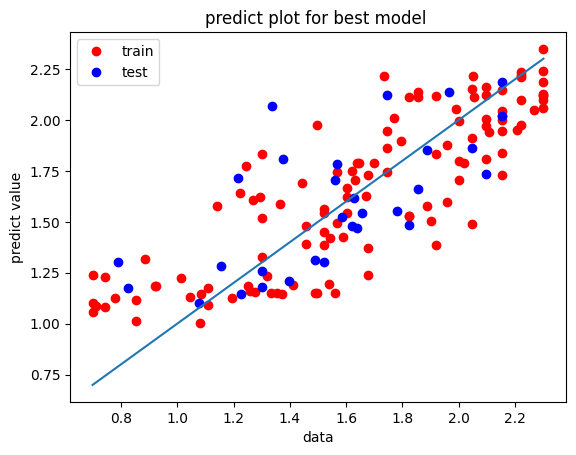

In [ ]:
x_org = df[features_select[:5]].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
modelFormula = ''
for i in range(0,len(reg.coef_[0])):
  modelFormula = modelFormula + str(reg.coef_[0][i])[:6] + '*' + features_select[i] + ' + '
modelFormula += str(reg.intercept_[0])[:6]
print(modelFormula)
f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
f3_test = f3_test.flatten()
f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
MSE_test = mean_squared_error(y_test, f3_test)
MSE_train = mean_squared_error(y_train, f3_train)
r2_train = r2_score(y_train, f3_train)
r2_test = r2_score(y_test, f3_test)
print('training MSE',MSE_train)
print('training R^2',r2_train)
print('testing MSE:',MSE_test)
print('testing R^2',r2_test)
plt.plot(y_train, f3_train, 'ro', label='train')
plt.plot(y_test, f3_test, 'bo', label='test')
plt.plot(y_plot,y_plot)
plt.legend()
plt.title('predict plot for best model '.format(i))
plt.xlabel('data')
plt.ylabel('predict value')
plt.show()

# paper feature selection result

In [ ]:
features_select = ['sO', 'aC', 'InOr', 'FO', 'aF', 'sC', 'sF', 'FC']

## take first 8th feature getting result

[-4.50178027]
results for feature number 1
testing MSE: 0.09485244299183088
testing R^2 0.24814477263307133


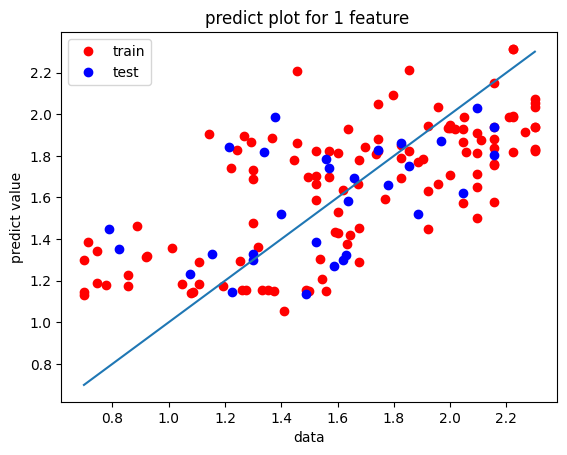

[ -4.9886129  -12.98426429]
results for feature number 2
testing MSE: 0.10263146658857374
testing R^2 0.18648374029123138


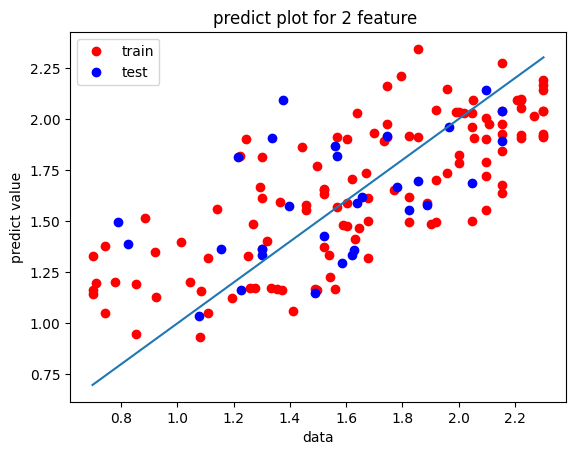

[ -4.78617156 -13.07527487   0.19402317]
results for feature number 3
testing MSE: 0.07934638899996789
testing R^2 0.37105470918178085


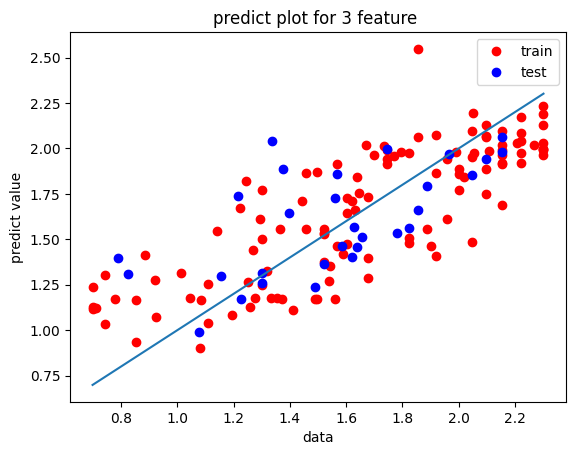

[ -4.23639419 -13.61839113   0.17082433   0.07464731]
results for feature number 4
testing MSE: 0.08021143383618722
testing R^2 0.3641978643657302


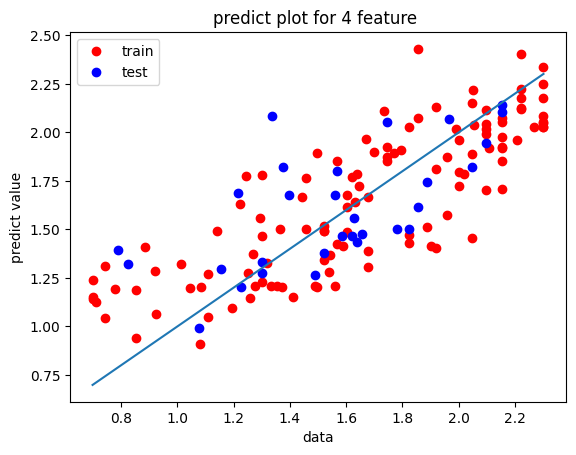

[-4.28595304 -9.73593308  0.22061942  0.05501743 -2.16004601]
results for feature number 5
testing MSE: 0.07763235908003581
testing R^2 0.38464109994322104


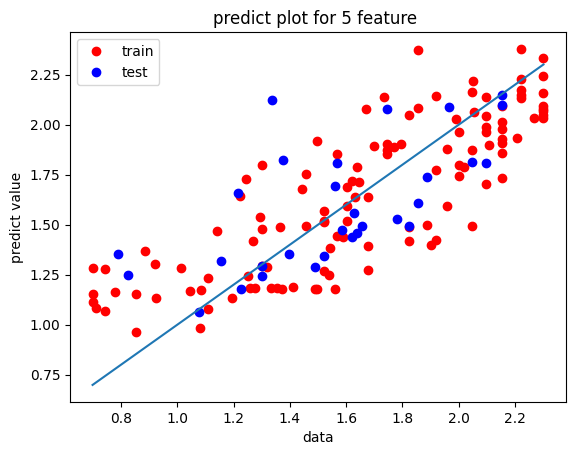

[ -4.18937264 -10.46633486   0.1974922    0.05924586  -2.19327002
  -0.57927145]
results for feature number 6
testing MSE: 0.07782447097760296
testing R^2 0.383118310124959


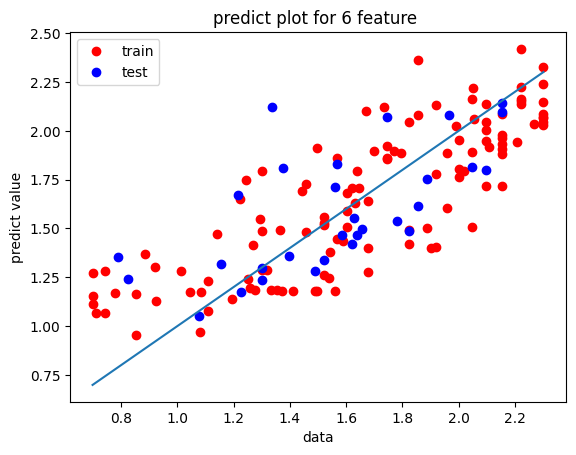

[ -3.9567406  -11.24312044   0.11024371   0.02138101  -1.34709372
  -1.75048037   0.75652151]
results for feature number 7
testing MSE: 0.07995160628636121
testing R^2 0.3662574075402528


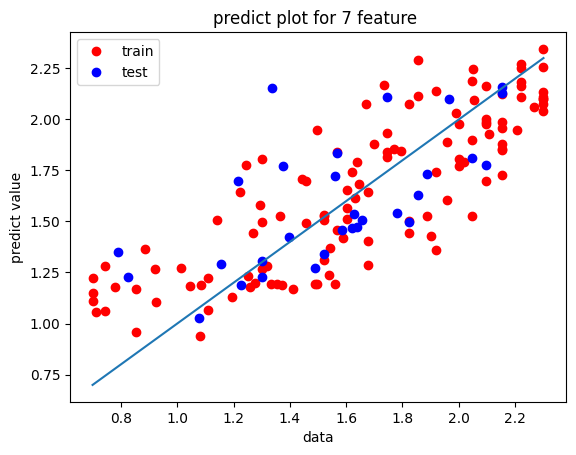

[-4.31903908 -8.9319009   0.2927344   0.07406852  5.80074823 -2.97000485
  9.08330206 -2.29137354]
results for feature number 8
testing MSE: 0.07015218421380717
testing R^2 0.4439332847030494


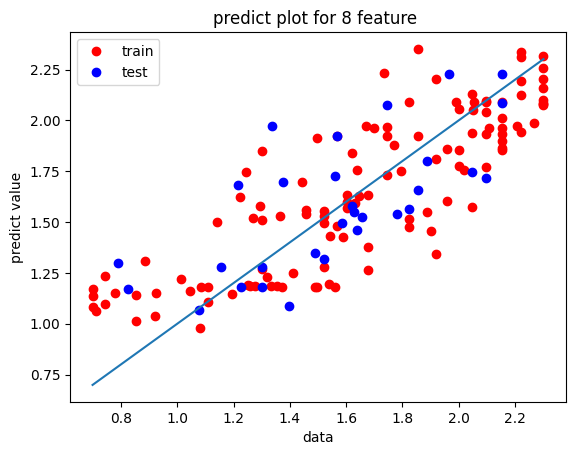

In [ ]:
from matplotlib import pyplot as plt
y_org = df.iloc[:, -1].to_numpy()
y_plot = np.linspace(np.min(y_org),np.max(y_org))
for i in range(1,9):   #take only until 8th feature as later not contribute
  x_org = df[features_select[:i]].to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
  f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
  f3_test = f3_test.flatten()
  f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
  r2_train = r2_score(y_train, f3_train)
  r2_test = r2_score(y_test, f3_test)
  MSE_test = mean_squared_error(y_test, f3_test)
  print(reg.coef_[0])
  print('results for feature number',i)
  print('testing MSE:',MSE_test)
  print('testing R^2',r2_test)
  plt.plot(y_train, f3_train, 'ro', label='train')
  plt.plot(y_test, f3_test, 'bo', label='test')
  plt.plot(y_plot,y_plot)
  plt.legend()
  plt.title('predict plot for {} feature '.format(i))
  plt.xlabel('data')
  plt.ylabel('predict value')
  plt.show()

## use 4 fold CV and BIC choose the best model

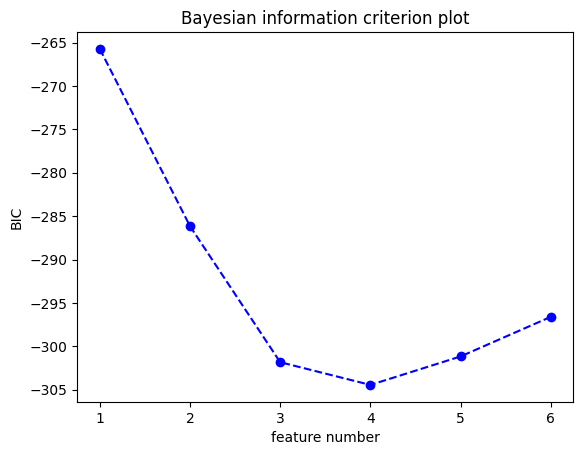

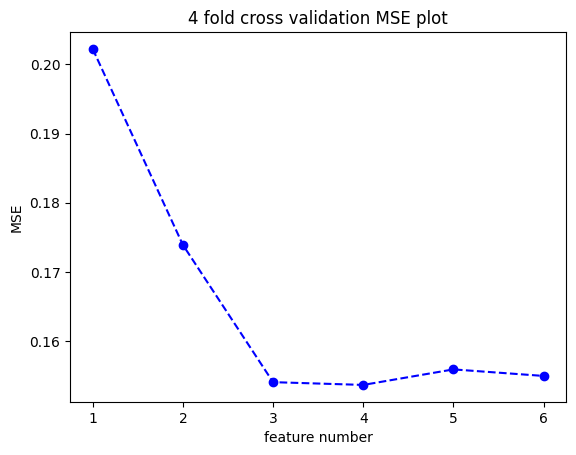

In [ ]:
BIC_mod = []
CV_mod = []
for i in range(1,7):   #take only until 8th feature as later not contribute
  x_org = df[features_select[:i]].to_numpy()
  x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
  reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
  f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
  f3_test = f3_test.flatten()
  f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
  MSE_test = mean_squared_error(y_test, f3_test)
  MSE_train = mean_squared_error(y_train, f3_train)
  BIC = x_train.shape[0]*np.log(MSE_train)+i*np.log(x_train.shape[0])
  BIC_mod.append(BIC)
  scoring_metrics = make_scorer(mean_squared_error, greater_is_better=False)
  score = cross_val_score(reg, x_org, y_org, cv=4, scoring=scoring_metrics)
  mse = -score.mean()
  CV_mod.append(mse)
plt.plot([i for i in range(1,len(BIC_mod)+1)],BIC_mod,'--bo')
plt.title('Bayesian information criterion plot')
plt.xlabel('feature number')
plt.ylabel('BIC')
plt.show()
plt.plot([i for i in range(1,len(CV_mod)+1)],CV_mod,'--bo')
plt.title('4 fold cross validation MSE plot')
plt.xlabel('feature number')
plt.ylabel('MSE')
plt.show()

4 features is the best

## best model result

-4.236*sO + -13.61*aC + 0.1708*InOr + 0.0746*FO + 2.0450
training MSE 0.06742923712390307
training R^2 0.6702375459114782
testing MSE: 0.08021143383618722
testing R^2 0.3641978643657302


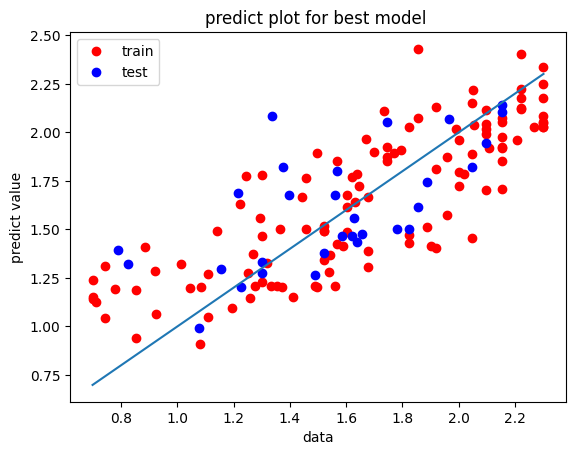

In [ ]:
x_org = df[features_select[:4]].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x_org, y_org, test_size=0.2, random_state=0)
reg = LinearRegression().fit(x_train.reshape(-1,x_org.shape[1]), y_train.reshape(-1,1))
modelFormula = ''
for i in range(0,len(reg.coef_[0])):
  modelFormula = modelFormula + str(reg.coef_[0][i])[:6] + '*' + features_select[i] + ' + '
modelFormula += str(reg.intercept_[0])[:6]
print(modelFormula)
f3_test = reg.predict(x_test.reshape(-1,x_org.shape[1]))
f3_test = f3_test.flatten()
f3_train =  x_train@reg.coef_[0].reshape(-1,1)+reg.intercept_[0]
MSE_test = mean_squared_error(y_test, f3_test)
MSE_train = mean_squared_error(y_train, f3_train)
r2_train = r2_score(y_train, f3_train)
r2_test = r2_score(y_test, f3_test)
print('training MSE',MSE_train)
print('training R^2',r2_train)
print('testing MSE:',MSE_test)
print('testing R^2',r2_test)
plt.plot(y_train, f3_train, 'ro', label='train')
plt.plot(y_test, f3_test, 'bo', label='test')
plt.plot(y_plot,y_plot)
plt.legend()
plt.title('predict plot for best model '.format(i))
plt.xlabel('data')
plt.ylabel('predict value')
plt.show()